In [1]:
# Importing libraraies and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imutils import paths
import random
import pickle
import cv2
import os
import time
import warnings
warnings.filterwarnings("ignore")
SEED = 42 # set random seed

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [2]:
# Initialize the data and labels

print("[INFO loading images...]")
time1 = time.time() # to measure time taken
data = []
labels = []

# Grabs the image path and randomly shuffle them
imagePaths = sorted(list(paths.list_images("Pizza Refund/train/"))) # data folder with 2 categorical folder
random.seed(SEED)
random.shuffle(imagePaths)

# Loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    
    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype = "float") / 255.0
labels = np.array(labels)

print("Time taken: {:.1f} seconds". format(time.time() - time1)) # to measure time taken
print("done")

[INFO loading images...]
Time taken: 13.8 seconds
done


In [3]:
labels

array(['Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', '

In [4]:
# Partition the data into 80% training and 20% validation

trainX, testX, trainY, testY = train_test_split(data, labels, test_size=.20, random_state = SEED)

In [5]:
trainX.shape

(567, 3072)

In [6]:
trainY.shape

(567,)

In [7]:
trainX

array([[0.86666667, 0.85882353, 0.81960784, ..., 0.23921569, 0.2627451 ,
        0.80784314],
       [0.09019608, 0.49803922, 0.85098039, ..., 0.2745098 , 0.63921569,
        0.88627451],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.07058824, 0.16078431, 0.37647059, ..., 0.86666667, 0.89411765,
        0.95294118],
       [0.06666667, 0.09019608, 0.2       , ..., 0.17254902, 0.19215686,
        0.2627451 ],
       [0.23921569, 0.25098039, 0.25098039, ..., 0.7254902 , 0.72156863,
        0.71764706]])

In [8]:
trainY

array(['Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Good_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Burnt_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza',
       'Pizza Refund/train/Burnt_pizza

In [9]:
type(trainY)

numpy.ndarray

In [10]:
# convert the labels from integers/categories to vectors 
# (for 2-class, binary classification you should use Keras' to_categorical function instead)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY) # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = lb.transform(testY)         # transform = perform the one-hot encoding (unique class labels already found)

In [11]:
trainY.shape

(567, 1)

In [12]:
trainX.shape

(567, 3072)

In [13]:
# Define the architecture of the network

model = Sequential()
model.add(Dense(1536, input_dim=3072, kernel_initializer="uniform",activation="relu"))
model.add(Dense(1536, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation = "sigmoid"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              2360832   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1537      
Total params: 7,082,497
Trainable params: 7,082,497
Non-trainable params: 0
_________________________________________________________________


In [15]:
print("[INFO] compiling model...")
sgd = SGD(lr = 0.01)
model.compile(optimizer="adam",metrics=["binary_accuracy"], loss= "binary_crossentropy")

H = model.fit(trainX, trainY, epochs=100, batch_size=128,
    verbose=1, validation_data=(testX, testY))

[INFO] compiling model...
Epoch 1/100
5/5 [==============================] - 1s 245ms/step - loss: 3.2426 - binary_accuracy: 0.5999 - val_loss: 0.6505 - val_binary_accuracy: 0.6197
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 1.0007 - binary_accuracy: 0.5876 - val_loss: 1.0246 - val_binary_accuracy: 0.5563
Epoch 3/100
5/5 [==============================] - 0s 58ms/step - loss: 0.6421 - binary_accuracy: 0.6393 - val_loss: 0.6052 - val_binary_accuracy: 0.6549
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.4890 - binary_accuracy: 0.7646 - val_loss: 0.5380 - val_binary_accuracy: 0.6972
Epoch 5/100
5/5 [==============================] - 0s 59ms/step - loss: 0.4100 - binary_accuracy: 0.8348 - val_loss: 0.5333 - val_binary_accuracy: 0.7254
Epoch 6/100
5/5 [==============================] - 0s 59ms/step - loss: 0.3975 - binary_accuracy: 0.8209 - val_loss: 0.5827 - val_binary_accuracy: 0.7394
Epoch 7/100
5/5 [==============================] 

Epoch 54/100
5/5 [==============================] - 0s 57ms/step - loss: 9.9378e-04 - binary_accuracy: 1.0000 - val_loss: 0.8672 - val_binary_accuracy: 0.8169
Epoch 55/100
5/5 [==============================] - 0s 56ms/step - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 0.8563 - val_binary_accuracy: 0.8099
Epoch 56/100
5/5 [==============================] - 0s 56ms/step - loss: 7.1234e-04 - binary_accuracy: 1.0000 - val_loss: 0.8631 - val_binary_accuracy: 0.8028
Epoch 57/100
5/5 [==============================] - 0s 56ms/step - loss: 8.4923e-04 - binary_accuracy: 1.0000 - val_loss: 0.8735 - val_binary_accuracy: 0.8099
Epoch 58/100
5/5 [==============================] - 0s 57ms/step - loss: 6.4790e-04 - binary_accuracy: 1.0000 - val_loss: 0.8804 - val_binary_accuracy: 0.8099
Epoch 59/100
5/5 [==============================] - 0s 56ms/step - loss: 6.8173e-04 - binary_accuracy: 1.0000 - val_loss: 0.8831 - val_binary_accuracy: 0.8028
Epoch 60/100
5/5 [==============================] 

In [16]:
print("[INFO] evaluating network...")

predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), labels=[0,1]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       142
   macro avg       0.50      0.50      0.50       142
weighted avg       1.00      1.00      1.00       142



In [17]:
lb.classes_

array(['Pizza Refund/train/Burnt_pizza', 'Pizza Refund/train/Good_pizza'],
      dtype='<U30')

In [18]:
print(accuracy_score(testY.argmax(axis=1), predictions.argmax(axis=1)))

1.0


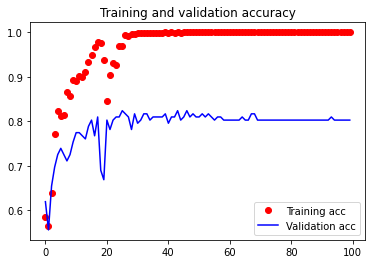

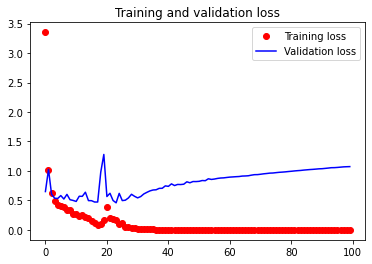

In [19]:
# Plotting Loss and Accuracy

acc = H.history["binary_accuracy"]
val_acc = H.history["val_binary_accuracy"]
loss = H.history["loss"]
val_loss = H.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "b", label= "Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test Data

In [48]:
Test_dir = r"Pizza Refund/test/"

In [49]:
data1 = []
#labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('Pizza Refund/test/')))   # data folder with 3 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data1.append(image)
 
    # extract the class label from the image path and update the labels list
    #label = imagePath.split(os.path.sep)[-2]
    #labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data1 = np.array(data1, dtype="float") / 255.0
#labels = np.array(labels)

In [50]:
data1

array([[0.44313725, 0.56470588, 0.68627451, ..., 1.        , 1.        ,
        1.        ],
       [0.02745098, 0.03529412, 0.03529412, ..., 0.08235294, 0.15294118,
        0.37254902],
       [0.29411765, 0.74117647, 0.96470588, ..., 0.58039216, 0.4627451 ,
        0.35686275],
       ...,
       [0.38039216, 0.49411765, 0.62745098, ..., 0.32156863, 0.43921569,
        0.57647059],
       [0.        , 0.00784314, 0.00784314, ..., 0.28627451, 0.41960784,
        0.6       ],
       [0.0745098 , 0.07058824, 0.07843137, ..., 0.08627451, 0.09803922,
        0.15294118]])

In [51]:
data1 = np.array(data1, dtype = "float32")

In [52]:
pred1 = model.predict(data1, batch_size=32)

In [53]:
pred1 = np.argmin(pred1, axis=1)

In [54]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
entries = ['.'.join(x.split('.')[:-1]) for x in os.listdir("Pizza Refund/test/") if os.path.isfile(os.path.join('Pizza Refund/test/', x))]
entries

['test_img (13)',
 'test_img (14)',
 'test_img (14)',
 'test_img (15)',
 'test_img (16)',
 'test_img (17)',
 'test_img (18)',
 'test_img (19)',
 'test_img (2)',
 'test_img (2)',
 'test_img (20)',
 'test_img (21)',
 'test_img (22)',
 'test_img (23)',
 'test_img (24)',
 'test_img (25)',
 'test_img (26)',
 'test_img (27)',
 'test_img (3)',
 'test_img (3)',
 'test_img (4)',
 'test_img (4)',
 'test_img (5)',
 'test_img (5)',
 'test_img (6)',
 'test_img (6)',
 'test_img (7)',
 'test_img (7)',
 'test_img (8)',
 'test_img (8)',
 'test_img (9)',
 'test_img (9)']

In [56]:
import pandas as pd

df = pd.DataFrame(list(zip(entries, pred1)), 
               columns =['pizza', 'label']) 
df 

,pizza,label
0,test_img (13),0
1,test_img (14),0
2,test_img (14),0
3,test_img (15),0
4,test_img (16),0
5,test_img (17),0
6,test_img (18),0
7,test_img (19),0
8,test_img (2),0
9,test_img (2),0
